[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab1-NetworkSci-PSN/notebooks/01-networkx_tutorial.ipynb)

Versjon 30.11.2025, A. Lundervold

# NetworkX Tutorial: Grafanalyse i Python

<img src="../assets/networkx_banner.svg" width="250">

Velkommen til denne praktiske innføringen i **NetworkX** – Python-biblioteket for å lage, manipulere og analysere komplekse nettverk og grafer.

---

## 🎯 Læringsmål

Etter denne notebooken vil du kunne:

| Ferdighet | Beskrivelse |
|-----------|-------------|
| **Opprette grafer** | Bygge urettede, rettede og vektede grafer fra bunnen av |
| **Manipulere noder og kanter** | Legge til, fjerne og endre elementer i en graf |
| **Bruke attributter** | Knytte metadata til grafer, noder og kanter |
| **Analysere strukturer** | Beregne sentralitet, klynger og korteste stier |
| **Visualisere nettverk** | Tegne og eksportere grafer til ulike formater |
| **Bruke grafgeneratorer** | Lage standardgrafer som brukes i forskning |

---

## 🏥 Hvorfor NetworkX i medisin og biologi?

I biomedisinsk forskning og klinisk praksis møter vi stadig **relasjonelle data** som naturlig kan representeres som nettverk:

### Biomedisinske anvendelser

| Anvendelse | Noder | Kanter | Medisinsk innsikt |
|------------|-------|--------|-------------------|
| **Protein-interaksjonsnettverk** | Proteiner | Fysiske bindinger | Identifisere nøkkelproteiner i sykdomsprosesser |
| **Genreguleringsnettverk** | Gener | Reguleringsforhold | Forstå genuttrykksmønstre ved kreft |
| **Sykdomskomorbiditetsnettverk** | Diagnoser | Delte pasienter | Oppdage ukjente sykdomssammenhenger |
| **Pasient-likhetsnettverk** | Pasienter | Klinisk likhet | Subtype-identifikasjon og presisjonsmedisin |
| **Hjernekonektivitetsnettverk** | Hjerneregioner | Strukturelle/funksjonelle forbindelser | Kartlegge nevrologiske tilstander |
| **Epidemiologiske nettverk** | Personer | Smittekontakter | Modellere smittespredning |

> 💡 **NetworkX** gir oss verktøyene til å **konstruere**, **analysere** og **visualisere** alle disse nettverkstypene i Python.

---

## 📚 Om denne guiden

Denne guiden er tilpasset fra den offisielle [NetworkX-tutorialen](https://networkx.org/documentation/latest/tutorial.html) ([LISENS](https://github.com/networkx/networkx/blob/main/LICENSE.txt)) med:

- 🇳🇴 Norsk språk og forklaringer
- 🏥 Medisinske og biologiske eksempler
- 📝 Utvidet dokumentasjon og kontekst
- 🎓 Didaktiske tillegg for studenter

**Forutsetninger:** Grunnleggende Python-kunnskap. Se eventuelt [Python-tutorialen](https://docs.python.org/3/tutorial/index.html).

---

## ⚙️ Oppsett og miljøsjekk

In [79]:
# ============================================================================
# MILJØSJEKK: Er vi i Google Colab eller lokalt miljø?
# ============================================================================
# Denne sjekken gjør vi i alle notebooks i kurset, fordi noen operasjoner
# (som filstier og installasjon av pakker) håndteres ulikt.

try:
    import google.colab
    is_colab = True
    print("🌐 Kjører i Google Colab")
    print("   → Noen pakker vil installeres automatisk ved behov")
except ImportError:
    is_colab = False
    print("💻 Kjører lokalt")
    print("   → Bruker conda-miljøet elmed219-2026")

💻 Kjører lokalt
   → Bruker conda-miljøet elmed219-2026


In [80]:
# ============================================================================
# IMPORTER NETWORKX
# ============================================================================
# NetworkX er hovedbiblioteket for nettverksanalyse i Python.
# Konvensjonen er å importere det som 'nx' for kortere kode.

import networkx as nx

print(f"✓ NetworkX versjon: {nx.__version__}")
print("")
print("NetworkX gir oss verktøy for å:")
print("  • Opprette og manipulere grafer")
print("  • Beregne nettverksmetrikker")
print("  • Visualisere nettverk")
print("  • Lese/skrive grafdata i ulike formater")

✓ NetworkX versjon: 3.4.2

NetworkX gir oss verktøy for å:
  • Opprette og manipulere grafer
  • Beregne nettverksmetrikker
  • Visualisere nettverk
  • Lese/skrive grafdata i ulike formater


---

# 1️⃣ Opprette grafer

## Hva er en graf i programmeringssammenheng?

I NetworkX er en **graf** (`Graph`) en datastruktur som inneholder:
- **Noder** (vertices) – objektene vi studerer
- **Kanter** (edges) – forbindelsene mellom dem

### Graftyper i NetworkX

| Klasse | Type | Beskrivelse | Medisinsk eksempel |
|--------|------|-------------|--------------------|
| `Graph` | Urettet | Kanter går begge veier | Pasient-likhetsnettverk |
| `DiGraph` | Rettet | Kanter har retning | Signalveier i celler |
| `MultiGraph` | Urettet, multiple kanter | Flere kanter mellom samme noder | Ulike relasjonstyper |
| `MultiDiGraph` | Rettet, multiple kanter | Kombinasjon av over | Komplekse reguleringsnettverk |

La oss starte med den enkleste typen – en urettet graf.

In [81]:
# ============================================================================
# OPPRETTE EN TOM GRAF
# ============================================================================
# Vi starter med en helt tom graf – ingen noder, ingen kanter.
# Tenk på det som et tomt lerret der vi skal tegne et nettverk.

G = nx.Graph()

print(f"Opprettet en tom graf av typen: {type(G).__name__}")
print(f"Antall noder: {G.number_of_nodes()}")
print(f"Antall kanter: {G.number_of_edges()}")

Opprettet en tom graf av typen: Graph
Antall noder: 0
Antall kanter: 0


---

# 2️⃣ Arbeide med noder

## Hva kan være en node?

I NetworkX kan noder være **alle hashbare Python-objekter**:
- Tall (heltall, flyttall)
- Tekststrenger
- Tupler
- Til og med andre grafer!

> 🏥 **Medisinsk kontekst:** Noder kan representere pasienter (ID-nummer), diagnoser (ICD-koder), proteiner (UniProt-ID), eller hjerneregioner (anatomiske navn).

### Legge til noder

In [82]:
# ============================================================================
# LEGGE TIL NODER – ENKELTVIS OG I GRUPPER
# ============================================================================

# Metode 1: Legg til én node om gangen
# Her bruker vi pasient-IDer som eksempel
G.add_node("Pasient_001")

print("Etter å ha lagt til én pasient:")
print(f"  Noder: {list(G.nodes)}")

Etter å ha lagt til én pasient:
  Noder: ['Pasient_001']


In [83]:
# ============================================================================
# LEGGE TIL FLERE NODER SAMTIDIG
# ============================================================================
# Når vi har mange noder, er det mer effektivt å legge til fra en liste.

# Metode 2: Legg til fra en liste (iterable)
pasienter = ["Pasient_002", "Pasient_003", "Pasient_004"]
G.add_nodes_from(pasienter)

print("Etter å ha lagt til flere pasienter:")
print(f"  Noder: {list(G.nodes)}")
print(f"  Antall: {G.number_of_nodes()}")

Etter å ha lagt til flere pasienter:
  Noder: ['Pasient_001', 'Pasient_002', 'Pasient_003', 'Pasient_004']
  Antall: 4


In [84]:
# ============================================================================
# LEGGE TIL NODER MED ATTRIBUTTER
# ============================================================================
# Noder kan ha tilknyttede data – svært nyttig i medisinske anvendelser!
# Vi bruker tupler på formen (node_id, {attributt_dict})

# Eksempel: Pasienter med alder og diagnose
pasienter_med_data = [
    ("Pasient_005", {"alder": 45, "diagnose": "Hypertensjon"}),
    ("Pasient_006", {"alder": 62, "diagnose": "Diabetes type 2"}),
    ("Pasient_007", {"alder": 38, "diagnose": "Astma"})
]
G.add_nodes_from(pasienter_med_data)

print("Pasienter med attributter:")
for node in ["Pasient_005", "Pasient_006", "Pasient_007"]:
    print(f"  {node}: {G.nodes[node]}")

Pasienter med attributter:
  Pasient_005: {'alder': 45, 'diagnose': 'Hypertensjon'}
  Pasient_006: {'alder': 62, 'diagnose': 'Diabetes type 2'}
  Pasient_007: {'alder': 38, 'diagnose': 'Astma'}


In [85]:
# ============================================================================
# OVERFØRE NODER FRA EN ANNEN GRAF
# ============================================================================
# Vi kan kopiere noder fra en eksisterende graf.
# Her lager vi først en sti-graf med 5 noder (0, 1, 2, 3, 4).

# En sti-graf er en enkel kjede av noder
sti_graf = nx.path_graph(5)
print(f"Sti-graf noder: {list(sti_graf.nodes)}")

# Legg til disse nodene i vår hovedgraf
G.add_nodes_from(sti_graf)
print(f"\nHovedgraf etter import:")
print(f"  Alle noder: {list(G.nodes)}")
print(f"  Totalt antall: {G.number_of_nodes()}")

Sti-graf noder: [0, 1, 2, 3, 4]

Hovedgraf etter import:
  Alle noder: ['Pasient_001', 'Pasient_002', 'Pasient_003', 'Pasient_004', 'Pasient_005', 'Pasient_006', 'Pasient_007', 0, 1, 2, 3, 4]
  Totalt antall: 12


### 💡 Fleksibiliteten i NetworkX

En interessant egenskap ved NetworkX er at en graf i seg selv kan være en node i en annen graf! Dette åpner for **hierarkiske strukturer** – for eksempel kan et sykehus (representert som et nettverk av avdelinger) være en node i et regionalt helsenettverk.

In [86]:
# ============================================================================
# EN GRAF SOM NODE
# ============================================================================
# Demonstrasjon av hierarkisk struktur

# Lag et lite "sykehus"-nettverk
sykehus = nx.Graph(name="Haukeland")
sykehus.add_nodes_from(["Akutten", "Kirurgi", "Medisin", "Radiologi"])
sykehus.add_edges_from([("Akutten", "Kirurgi"), ("Akutten", "Radiologi")])

# Lag et regionalt nettverk og legg til sykehuset som en node
region = nx.Graph(name="Helse Vest")
region.add_node(sykehus)  # Hele grafen blir en node!
region.add_node("Stavanger Universitetssykehus")
region.add_node("Førde sentralsjukehus")

print(f"Regionalt nettverk '{region.graph.get('name', 'ukjent')}'")
print(f"  Antall noder: {region.number_of_nodes()}")
print(f"  Type første node: {type(list(region.nodes)[0])}")

Regionalt nettverk 'Helse Vest'
  Antall noder: 3
  Type første node: <class 'networkx.classes.graph.Graph'>


---

# 3️⃣ Arbeide med kanter

## Hva representerer en kant?

En **kant** (edge) er en forbindelse mellom to noder. I medisinske nettverk kan kanter representere:

| Nettverkstype | Kantens betydning |
|---------------|-------------------|
| Pasient-likhet | Grad av klinisk likhet mellom pasienter |
| Protein-interaksjon | Fysisk binding mellom proteiner |
| Ko-morbiditet | To diagnoser som ofte opptrer sammen |
| Epidemiologi | Smittekontakt mellom personer |
| Genregulering | Et gen regulerer et annet |

### Legge til kanter


In [87]:
# ============================================================================
# LEGGE TIL KANTER – ENKELTVIS
# ============================================================================
# La oss starte med en ny, ren graf for dette eksempelet.

# Opprett graf for pasient-likhetsnettverk
PSN = nx.Graph(name="Pasient-likhetsnettverk")

# Legg til en kant mellom to pasienter
# Merk: Nodene opprettes automatisk hvis de ikke finnes!
PSN.add_edge("Pasient_A", "Pasient_B")

print("Etter å ha lagt til én kant:")
print(f"  Noder: {list(PSN.nodes)}")
print(f"  Kanter: {list(PSN.edges)}")


Etter å ha lagt til én kant:
  Noder: ['Pasient_A', 'Pasient_B']
  Kanter: [('Pasient_A', 'Pasient_B')]


In [88]:
# ============================================================================
# LEGGE TIL FLERE KANTER SAMTIDIG
# ============================================================================
# Effektiv måte å bygge nettverk på – legg til mange kanter fra en liste.

# Liste over pasient-likheter (kanter)
likheter = [
    ("Pasient_A", "Pasient_C"),
    ("Pasient_B", "Pasient_C"),
    ("Pasient_C", "Pasient_D"),
    ("Pasient_D", "Pasient_E"),
    ("Pasient_A", "Pasient_E")
]
PSN.add_edges_from(likheter)

print("Pasient-likhetsnettverk:")
print(f"  Antall pasienter (noder): {PSN.number_of_nodes()}")
print(f"  Antall likhetsrelasjoner (kanter): {PSN.number_of_edges()}")
print(f"  Kanter: {list(PSN.edges)}")


Pasient-likhetsnettverk:
  Antall pasienter (noder): 5
  Antall likhetsrelasjoner (kanter): 6
  Kanter: [('Pasient_A', 'Pasient_B'), ('Pasient_A', 'Pasient_C'), ('Pasient_A', 'Pasient_E'), ('Pasient_B', 'Pasient_C'), ('Pasient_C', 'Pasient_D'), ('Pasient_D', 'Pasient_E')]


In [89]:
# ============================================================================
# LEGGE TIL VEKTEDE KANTER
# ============================================================================
# I medisinske nettverk er kantene ofte vektet – f.eks. grad av likhet.
# Vi kan legge til vekter som attributter.

# Opprett nytt nettverk med vektede kanter
PSN_vektet = nx.Graph(name="Vektet pasient-likhetsnettverk")

# Legg til kanter med likhetsscore (vekt mellom 0 og 1)
vektede_likheter = [
    ("P1", "P2", 0.85),   # Høy likhet
    ("P1", "P3", 0.42),   # Moderat likhet
    ("P2", "P3", 0.91),   # Svært høy likhet
    ("P2", "P4", 0.67),   # God likhet
    ("P3", "P4", 0.35)    # Lav likhet
]
PSN_vektet.add_weighted_edges_from(vektede_likheter)

print("Vektet pasient-likhetsnettverk:")
for u, v, data in PSN_vektet.edges(data=True):
    print(f"  {u} ↔ {v}: likhet = {data['weight']:.2f}")


Vektet pasient-likhetsnettverk:
  P1 ↔ P2: likhet = 0.85
  P1 ↔ P3: likhet = 0.42
  P2 ↔ P3: likhet = 0.91
  P2 ↔ P4: likhet = 0.67
  P3 ↔ P4: likhet = 0.35


---

# 4️⃣ Undersøke grafelementer

## Visninger (Views) i NetworkX

NetworkX tilbyr fire grunnleggende **visninger** for å undersøke en grafs struktur:

| Visning | Beskrivelse | Eksempel |
|---------|-------------|----------|
| `G.nodes` | Alle noder i grafen | Liste over pasienter |
| `G.edges` | Alle kanter i grafen | Liste over likhetsrelasjoner |
| `G.adj` | Naboer for hver node | Hvem ligner på hvem? |
| `G.degree` | Antall kanter per node | Hvor mange ligner på denne pasienten? |

Disse visningene er **"levende"** – de oppdateres automatisk når grafen endres.


In [90]:
# ============================================================================
# UNDERSØKE GRAFEN
# ============================================================================
# La oss bruke PSN (pasient-likhetsnettverk) vi lagde tidligere.

print("=" * 50)
print("UNDERSØKELSE AV PASIENT-LIKHETSNETTVERK")
print("=" * 50)

# Noder (pasienter)
print(f"\n📋 Alle pasienter (noder):")
print(f"   {list(PSN.nodes)}")

# Kanter (likhetsrelasjoner)
print(f"\n🔗 Alle likhetsrelasjoner (kanter):")
for kant in PSN.edges:
    print(f"   {kant[0]} ↔ {kant[1]}")

# Naboer til en spesifikk pasient
print(f"\n👥 Pasienter som ligner på Pasient_A:")
print(f"   {list(PSN.adj['Pasient_A'])}")

# Grad (antall likhetsrelasjoner)
print(f"\n📊 Antall likhetsrelasjoner per pasient (grad):")
for node, grad in PSN.degree():
    print(f"   {node}: {grad} likhetsrelasjoner")


UNDERSØKELSE AV PASIENT-LIKHETSNETTVERK

📋 Alle pasienter (noder):
   ['Pasient_A', 'Pasient_B', 'Pasient_C', 'Pasient_D', 'Pasient_E']

🔗 Alle likhetsrelasjoner (kanter):
   Pasient_A ↔ Pasient_B
   Pasient_A ↔ Pasient_C
   Pasient_A ↔ Pasient_E
   Pasient_B ↔ Pasient_C
   Pasient_C ↔ Pasient_D
   Pasient_D ↔ Pasient_E

👥 Pasienter som ligner på Pasient_A:
   ['Pasient_B', 'Pasient_C', 'Pasient_E']

📊 Antall likhetsrelasjoner per pasient (grad):
   Pasient_A: 3 likhetsrelasjoner
   Pasient_B: 2 likhetsrelasjoner
   Pasient_C: 3 likhetsrelasjoner
   Pasient_D: 2 likhetsrelasjoner
   Pasient_E: 2 likhetsrelasjoner


---

# 5️⃣ Fjerne elementer

## Rense og modifisere nettverk

I dataanalyse må vi ofte filtrere bort noder eller kanter – for eksempel pasienter som ikke møter inklusjonskriterier, eller svake koblinger under en terskelverdi.

| Metode | Funksjon |
|--------|----------|
| `G.remove_node(n)` | Fjern én node (og alle dens kanter) |
| `G.remove_nodes_from(liste)` | Fjern flere noder |
| `G.remove_edge(u, v)` | Fjern én kant |
| `G.remove_edges_from(liste)` | Fjern flere kanter |
| `G.clear()` | Tøm hele grafen |


In [91]:
# ============================================================================
# FJERNE NODER OG KANTER
# ============================================================================

# Lag en kopi av PSN for å demonstrere
test_graf = PSN.copy()
print(f"Før fjerning:")
print(f"  Noder: {list(test_graf.nodes)}")
print(f"  Kanter: {list(test_graf.edges)}")

# Fjern en pasient (og alle deres likhetsrelasjoner)
test_graf.remove_node("Pasient_E")
print(f"\nEtter fjerning av Pasient_E:")
print(f"  Noder: {list(test_graf.nodes)}")
print(f"  Kanter: {list(test_graf.edges)}")

# Fjern en spesifikk likhetsrelasjon
test_graf.remove_edge("Pasient_A", "Pasient_B")
print(f"\nEtter fjerning av kant A-B:")
print(f"  Kanter: {list(test_graf.edges)}")


Før fjerning:
  Noder: ['Pasient_A', 'Pasient_B', 'Pasient_C', 'Pasient_D', 'Pasient_E']
  Kanter: [('Pasient_A', 'Pasient_B'), ('Pasient_A', 'Pasient_C'), ('Pasient_A', 'Pasient_E'), ('Pasient_B', 'Pasient_C'), ('Pasient_C', 'Pasient_D'), ('Pasient_D', 'Pasient_E')]

Etter fjerning av Pasient_E:
  Noder: ['Pasient_A', 'Pasient_B', 'Pasient_C', 'Pasient_D']
  Kanter: [('Pasient_A', 'Pasient_B'), ('Pasient_A', 'Pasient_C'), ('Pasient_B', 'Pasient_C'), ('Pasient_C', 'Pasient_D')]

Etter fjerning av kant A-B:
  Kanter: [('Pasient_A', 'Pasient_C'), ('Pasient_B', 'Pasient_C'), ('Pasient_C', 'Pasient_D')]


---

# 6️⃣ Attributter på grafer, noder og kanter

## Lagre metadata i grafen

Attributter er **nøkkel-verdi-par** som kan knyttes til:
- **Grafen selv** – metadata om hele nettverket
- **Noder** – egenskaper ved hvert objekt
- **Kanter** – egenskaper ved hver relasjon

> 🏥 **Medisinsk nytte:** Attributter lar oss lagre rik informasjon – pasientdemografi, biomarkørverdier, diagnose-koder, laboratorieverdier, etc.


In [92]:
# ============================================================================
# GRAF-, NODE- OG KANT-ATTRIBUTTER
# ============================================================================

# Opprett graf med metadata
studie = nx.Graph(
    name="Kohortestudie IBS",
    dato="2024-01-15",
    n_pasienter=78,
    institutt="Haukeland Universitetssykehus"
)

print("📋 Graf-attributter:")
for nøkkel, verdi in studie.graph.items():
    print(f"   {nøkkel}: {verdi}")

# Legg til pasienter med kliniske data
studie.add_node("IBS_001", alder=34, kjønn="K", IBS_SSS=285, angst_score=12)
studie.add_node("IBS_002", alder=45, kjønn="M", IBS_SSS=312, angst_score=8)
studie.add_node("IBS_003", alder=28, kjønn="K", IBS_SSS=198, angst_score=15)

print("\n👤 Node-attributter (pasientdata):")
for node, data in studie.nodes(data=True):
    print(f"   {node}: {data}")

# Legg til kanter med likhetsscorer
studie.add_edge("IBS_001", "IBS_002", likhet=0.78, metode="euklidsk", p_verdi=0.003)
studie.add_edge("IBS_001", "IBS_003", likhet=0.65, metode="euklidsk", p_verdi=0.01)
studie.add_edge("IBS_002", "IBS_003", likhet=0.52, metode="euklidsk", p_verdi=0.042)

print("\n🔗 Kant-attributter (likhetsdata):")
for u, v, data in studie.edges(data=True):
    print(f"   {u} ↔ {v}: {data}")


📋 Graf-attributter:
   name: Kohortestudie IBS
   dato: 2024-01-15
   n_pasienter: 78
   institutt: Haukeland Universitetssykehus

👤 Node-attributter (pasientdata):
   IBS_001: {'alder': 34, 'kjønn': 'K', 'IBS_SSS': 285, 'angst_score': 12}
   IBS_002: {'alder': 45, 'kjønn': 'M', 'IBS_SSS': 312, 'angst_score': 8}
   IBS_003: {'alder': 28, 'kjønn': 'K', 'IBS_SSS': 198, 'angst_score': 15}

🔗 Kant-attributter (likhetsdata):
   IBS_001 ↔ IBS_002: {'likhet': 0.78, 'metode': 'euklidsk', 'p_verdi': 0.003}
   IBS_001 ↔ IBS_003: {'likhet': 0.65, 'metode': 'euklidsk', 'p_verdi': 0.01}
   IBS_002 ↔ IBS_003: {'likhet': 0.52, 'metode': 'euklidsk', 'p_verdi': 0.042}


---

# 7️⃣ Rettede grafer (DiGraph)

## Når retning betyr noe

I mange biologiske sammenhenger har relasjonene en **retning**:

| Eksempel | Betydning av retning |
|----------|---------------------|
| Gen → Protein | Transkripsjonsretning |
| Transkripsjonsfaktor → Gen | Regulatorisk kontroll |
| Nevron A → Nevron B | Signaloverføring |
| Enzym → Substrat | Katalytisk reaksjon |

For slike nettverk bruker vi **DiGraph** (directed graph).


In [93]:
# ============================================================================
# RETTET GRAF: GENREGULERINGSNETTVERK
# ============================================================================

# Opprett rettet graf
regulering = nx.DiGraph(name="Genreguleringsnettverk")

# Legg til regulatoriske kanter (TF → målgen)
regulering.add_edge("TP53", "p21", effekt="aktivering", styrke=0.9)
regulering.add_edge("TP53", "BAX", effekt="aktivering", styrke=0.7)
regulering.add_edge("MYC", "p21", effekt="hemming", styrke=0.6)
regulering.add_edge("MYC", "CDK4", effekt="aktivering", styrke=0.8)
regulering.add_edge("RB1", "E2F1", effekt="hemming", styrke=0.85)
regulering.add_edge("E2F1", "MYC", effekt="aktivering", styrke=0.5)

print("Genreguleringsnettverk:")
print(f"  Gener/proteiner: {list(regulering.nodes)}")
print(f"  Reguleringer: {regulering.number_of_edges()}")

# Spesielle metoder for rettede grafer
node = "TP53"
print(f"\nAnalyse av {node}:")
print(f"  → Regulerer (successors): {list(regulering.successors(node))}")
print(f"  ← Reguleres av (predecessors): {list(regulering.predecessors(node))}")
print(f"  Ut-grad: {regulering.out_degree(node)}")
print(f"  Inn-grad: {regulering.in_degree(node)}")


Genreguleringsnettverk:
  Gener/proteiner: ['TP53', 'p21', 'BAX', 'MYC', 'CDK4', 'RB1', 'E2F1']
  Reguleringer: 6

Analyse av TP53:
  → Regulerer (successors): ['p21', 'BAX']
  ← Reguleres av (predecessors): []
  Ut-grad: 2
  Inn-grad: 0


---

# 8️⃣ Grafgeneratorer

## Ferdiglagde nettverksstrukturer

NetworkX har mange innebygde **grafgeneratorer** som er nyttige for:
- Testing og utvikling
- Simulering av nettverksmodeller
- Sammenligning med empiriske nettverk

### Klassiske og stokastiske grafmodeller

| Modell | Egenskap | Biologisk eksempel |
|--------|----------|-------------------|
| **Komplett graf** | Alle noder forbundet | Idealisert interaksjon |
| **Erdős-Rényi** | Tilfeldig kobling | Nullmodell for sammenligning |
| **Watts-Strogatz** | Small-world | Nevrale nettverk i hjernen |
| **Barabási-Albert** | Scale-free (huber) | Protein-interaksjoner, metabolisme |


In [94]:
# ============================================================================
# STOKASTISKE GRAFMODELLER
# ============================================================================
# Disse modellene er viktige for å simulere og forstå nettverksegenskaper.

import numpy as np
np.random.seed(42)  # For reproduserbarhet

# 1. Erdős-Rényi tilfeldig graf
# Hvert par av noder har sannsynlighet p for å ha en kant
ER = nx.erdos_renyi_graph(n=100, p=0.05, seed=42)
print("Erdős-Rényi tilfeldig graf (n=100, p=0.05):")
print(f"  Kanter: {ER.number_of_edges()}")
print(f"  Gjennomsnittlig grad: {sum(dict(ER.degree()).values()) / ER.number_of_nodes():.2f}")

# 2. Watts-Strogatz "small-world" graf
# Kombinerer høy klynging med kort gjennomsnittlig stiavstand
WS = nx.watts_strogatz_graph(n=50, k=4, p=0.1, seed=42)
print(f"\nWatts-Strogatz small-world (n=50, k=4, p=0.1):")
print(f"  Klyngekoeffisient: {nx.average_clustering(WS):.3f}")

# 3. Barabási-Albert preferential attachment (scale-free)
# Nye noder kobles til eksisterende noder proporsjonalt med deres grad
BA = nx.barabasi_albert_graph(n=100, m=2, seed=42)
print(f"\nBarabási-Albert scale-free (n=100, m=2):")
grader = sorted([d for n, d in BA.degree()], reverse=True)
print(f"  Høyeste grader (huber): {grader[:5]}")
print(f"  → Typisk for 'hub'-struktur i biologiske nettverk")


Erdős-Rényi tilfeldig graf (n=100, p=0.05):
  Kanter: 224
  Gjennomsnittlig grad: 4.48

Watts-Strogatz small-world (n=50, k=4, p=0.1):
  Klyngekoeffisient: 0.343

Barabási-Albert scale-free (n=100, m=2):
  Høyeste grader (huber): [36, 25, 20, 13, 10]
  → Typisk for 'hub'-struktur i biologiske nettverk


---

# 9️⃣ Grafanalyse

## Beregne nettverksmetrikker

NetworkX tilbyr et bredt spekter av algoritmer for å analysere nettverksstruktur. Her ser vi på noen av de viktigste.

### Sentralitetsanalyse

Sentralitetsmål hjelper oss å identifisere de **viktigste nodene** i et nettverk:

| Sentralitet | Spørsmål | Medisinsk anvendelse |
|-------------|----------|---------------------|
| **Grad** | Hvem har flest forbindelser? | Pasient med mange likhetsrelasjoner |
| **Mellomlegg** | Hvem ligger på flest korteste stier? | Nøkkelprotein i signalveier |
| **Nærhet** | Hvem kan nå alle raskest? | Sentralt symptom i symptomnettverk |
| **Egenvektor** | Hvem er koblet til viktige noder? | Innflytelsesrik sykdom i komorbiditet |


In [95]:
# ============================================================================
# SENTRALITETSANALYSE
# ============================================================================

print("=" * 50)
print("SENTRALITETSANALYSE AV BARABÁSI-ALBERT NETTVERK")
print("=" * 50)

# Gradsentralitet
grad_sentralitet = nx.degree_centrality(BA)
topp_grad = sorted(grad_sentralitet.items(), key=lambda x: x[1], reverse=True)[:5]
print(f"\n1️⃣ Topp 5 noder etter gradsentralitet:")
for node, verdi in topp_grad:
    print(f"   Node {node}: {verdi:.4f}")

# Mellomleddsentralitet
mellomlegg = nx.betweenness_centrality(BA)
topp_mellomlegg = sorted(mellomlegg.items(), key=lambda x: x[1], reverse=True)[:5]
print(f"\n2️⃣ Topp 5 noder etter mellomleddsentralitet:")
for node, verdi in topp_mellomlegg:
    print(f"   Node {node}: {verdi:.4f}")

# Egenvektorsentralitet
egenvektor = nx.eigenvector_centrality(BA, max_iter=1000)
topp_egenvektor = sorted(egenvektor.items(), key=lambda x: x[1], reverse=True)[:5]
print(f"\n3️⃣ Topp 5 noder etter egenvektorsentralitet:")
for node, verdi in topp_egenvektor:
    print(f"   Node {node}: {verdi:.4f}")

print("\n💡 Merk: De samme nodene har ofte høy sentralitet på flere mål!")
print("   Dette er typisk for 'hub'-noder i scale-free nettverk.")


SENTRALITETSANALYSE AV BARABÁSI-ALBERT NETTVERK

1️⃣ Topp 5 noder etter gradsentralitet:
   Node 0: 0.3636
   Node 4: 0.2525
   Node 1: 0.2020
   Node 5: 0.1313
   Node 6: 0.1010

2️⃣ Topp 5 noder etter mellomleddsentralitet:
   Node 0: 0.4088
   Node 4: 0.2537
   Node 1: 0.2182
   Node 5: 0.1168
   Node 6: 0.0876

3️⃣ Topp 5 noder etter egenvektorsentralitet:
   Node 0: 0.4987
   Node 4: 0.3306
   Node 1: 0.3211
   Node 5: 0.2047
   Node 2: 0.1431

💡 Merk: De samme nodene har ofte høy sentralitet på flere mål!
   Dette er typisk for 'hub'-noder i scale-free nettverk.


In [96]:
# ============================================================================
# STRUKTURELLE METRIKKER
# ============================================================================

print("=" * 50)
print("STRUKTURANALYSE AV WATTS-STROGATZ NETTVERK")
print("=" * 50)

# Konnektivitet
print(f"\n📊 Grunnleggende egenskaper:")
print(f"  Er grafen sammenhengende? {nx.is_connected(WS)}")

# Klynging
print(f"\n🔗 Klyngekoeffisienter:")
print(f"  Gjennomsnittlig: {nx.average_clustering(WS):.4f}")
print(f"  Global (transitivitet): {nx.transitivity(WS):.4f}")

# Korteste stier
if nx.is_connected(WS):
    print(f"\n📏 Stiavstander:")
    avg_sti = nx.average_shortest_path_length(WS)
    diameter = nx.diameter(WS)
    print(f"  Gjennomsnittlig korteste sti: {avg_sti:.2f}")
    print(f"  Diameter (maks avstand): {diameter}")
    print(f"  → Lav verdi indikerer 'small-world' egenskap")


STRUKTURANALYSE AV WATTS-STROGATZ NETTVERK

📊 Grunnleggende egenskaper:
  Er grafen sammenhengende? True

🔗 Klyngekoeffisienter:
  Gjennomsnittlig: 0.3433
  Global (transitivitet): 0.3280

📏 Stiavstander:
  Gjennomsnittlig korteste sti: 3.64
  Diameter (maks avstand): 7
  → Lav verdi indikerer 'small-world' egenskap


---

# 🔟 Visualisering av grafer

## Tegne nettverk med Matplotlib

NetworkX har innebygd støtte for grafvisualisering via Matplotlib. God visualisering er viktig for å kommunisere nettverksanalyser til medisinske fagmiljøer.

### Plasseringsalgoritmer (Layouts)

Hvordan nodene plasseres i en visualisering kan dramatisk påvirke lesbarheten og innsikten vi får fra nettverket. Her er de fire vanligste algoritmene:

| Engelsk | Norsk | Forklaring |
|---------|-------|------------|
| **Random layout** | **Tilfeldig plassering** | Nodene plasseres helt tilfeldig |
| **Circular layout** | **Sirkulær plassering** | Nodene plasseres jevnt fordelt i en sirkel |
| **Spring layout** | **Kraftbasert/fjær-layout** | Simulerer fysiske fjærkrefter mellom nodene |
| **Kamada-Kawai layout** | **Energioptimalisert** | Minimerer en "energifunksjon" for optimal estetikk |

---

<details>
<summary>🔬 <b>Dypdykk: Plasseringsalgoritmer i detalj</b> (klikk for å utvide)</summary>

### 1️⃣ Tilfeldig plassering (Random Layout)

**Motivasjon:**  
Raskeste og enkleste metode – nyttig som utgangspunkt eller for å se om mønstre oppstår tilfeldig.

**Algoritme:**  
Hver node tildeles en tilfeldig (x, y)-posisjon innenfor et definert område.

| ✅ Fordeler | ❌ Ulemper |
|-------------|-----------|
| Svært rask (O(n)) | Gir sjelden meningsfull struktur |
| Ingen parametre å justere | Overlappende noder |
| Nyttig som nullmodell | Vanskelig å tolke |

**Når bruke:** Når du vil sammenligne med en strukturert layout, eller for svært store nettverk der andre metoder er for trege.

---

### 2️⃣ Sirkulær plassering (Circular Layout)

**Motivasjon:**  
Plasserer alle noder på en sirkel – gjør det lett å se alle forbindelser og sammenligne grad.

**Algoritme:**  
Nodene fordeles jevnt rundt en sirkel med vinkler θᵢ = 2πi/n, der n er antall noder.

| ✅ Fordeler | ❌ Ulemper |
|-------------|-----------|
| Alle noder like synlige | Mange kryssende kanter |
| Lett å sammenligne grad | Klynger vises ikke tydelig |
| Deterministisk (samme resultat hver gang) | Skalerer dårlig for store nettverk |

**Når bruke:** For å vise grad-fordeling, eller når rekkefølgen av noder har betydning (f.eks. kronologisk).

---

### 3️⃣ Kraftbasert/fjær-layout (Spring Layout)

**Motivasjon:**  
Simulerer et fysisk system der kanter er "fjærer" og noder frastøter hverandre – naturlige klynger blir synlige.

**Algoritme (Fruchterman-Reingold):**
1. Start med tilfeldig plassering
2. Beregn frastøtende kraft mellom alle nodepar: F_repell ∝ 1/d²
3. Beregn tiltrekkende kraft langs kanter: F_attract ∝ d²
4. Flytt nodene i kraftretningen
5. Gjenta til systemet stabiliserer seg (eller maks iterasjoner)

| ✅ Fordeler | ❌ Ulemper |
|-------------|-----------|
| Avslører naturlige klynger | Kan være treg for store nettverk (O(n²) per iterasjon) |
| Estetisk tiltalende | Resultat avhenger av startposisjon |
| Godt dokumentert og mye brukt | Kan sette seg fast i lokale minima |

**Når bruke:** Generell visualisering, spesielt for å oppdage samfunn/klynger i nettverket.

**Tips:** Bruk `seed`-parameter for reproduserbare resultater.

---

### 4️⃣ Energioptimalisert (Kamada-Kawai Layout)

**Motivasjon:**  
Plasserer noder slik at grafisk avstand reflekterer nettverksavstand (korteste sti).

**Algoritme:**  
Minimerer en energifunksjon:

E = Σᵢⱼ kᵢⱼ (|pᵢ - pⱼ| - dᵢⱼ)²

der dᵢⱼ er korteste sti mellom node i og j, og kᵢⱼ er en vektfaktor.

| ✅ Fordeler | ❌ Ulemper |
|-------------|-----------|
| Avstand i figuren ≈ avstand i grafen | Tregere enn spring layout |
| Svært estetisk for små/mellomstore grafer | Krever sammenhengende graf |
| Deterministisk (samme resultat hver gang) | Skalerer dårlig for >500 noder |

**Når bruke:** Når du vil at visuell nærhet skal reflektere nettverksnærhet, f.eks. i pasient-likhetsnettverk.

---

### 5️⃣ Geografisk/anatomisk plassering (Fixed Layout)

**Motivasjon:**  
Noen ganger har nodenes posisjon en **reell fysisk betydning** som bør bevares i visualiseringen.

**Algoritme:**  
Ingen algoritme – posisjonene settes manuelt basert på virkelige koordinater (GPS, anatomiske atlas, etc.).

```python
# Eksempel: Norske byer med GPS-koordinater (longitude, latitude)
pos = {
    "Oslo": (10.75, 59.91),
    "Bergen": (5.32, 60.39),
    "Trondheim": (10.40, 63.43),
    "Stavanger": (5.73, 58.97),
    "Tromsø": (18.96, 69.65)
}
nx.draw(G, pos=pos, with_labels=True)
```

| ✅ Fordeler | ❌ Ulemper |
|-------------|-----------|
| Bevarer romlig/geografisk mening | Krever kjente koordinater |
| Intuitiv for leseren | Kan gi overlappende noder |
| Direkte kobling til virkeligheten | Kanter kan krysse på uoversiktlig måte |

**Medisinske anvendelser:**

| Eksempel | Noder | Posisjon basert på |
|----------|-------|-------------------|
| **Smittespredning** | Sykehus, kommuner | GPS-koordinater |
| **Hjernekonektivitet** | Hjerneregioner | MNI/Talairach-koordinater |
| **Kroppssystemer** | Organer | Anatomisk posisjon |
| **Helsedemografi** | Fylker/kommuner | Geografisk plassering |
| **Klinikknettverk** | Sykehus | Lokasjon på kart |

**Tips:** For geografiske data, bruk biblioteker som `geopandas` eller `folium` for kartbasert visualisering i tillegg til NetworkX.

---

### 🏥 Valg av layout i medisinsk kontekst

| Nettverkstype | Anbefalt layout | Begrunnelse |
|---------------|-----------------|-------------|
| **Pasient-likhetsnettverk** | Kamada-Kawai eller Spring | Viser likhetsgrupper tydelig |
| **Protein-interaksjoner** | Spring | Avslører funksjonelle moduler |
| **Signalveier** | Hierarkisk (ikke vist her) | Viser retning/flyt |
| **Symptom-nettverk** | Spring eller sirkulær | Avhenger av om klynger er viktig |
| **Smittespredning** | Geografisk (fixed) | Romlig spredning er meningsfull |
| **Hjernekonektivitet** | Anatomisk (fixed) | Hjerneregioners posisjon er viktig |
| **Store nettverk (>1000 noder)** | Tilfeldig eller spesialiserte verktøy | NetworkX-layouts blir trege |

</details>


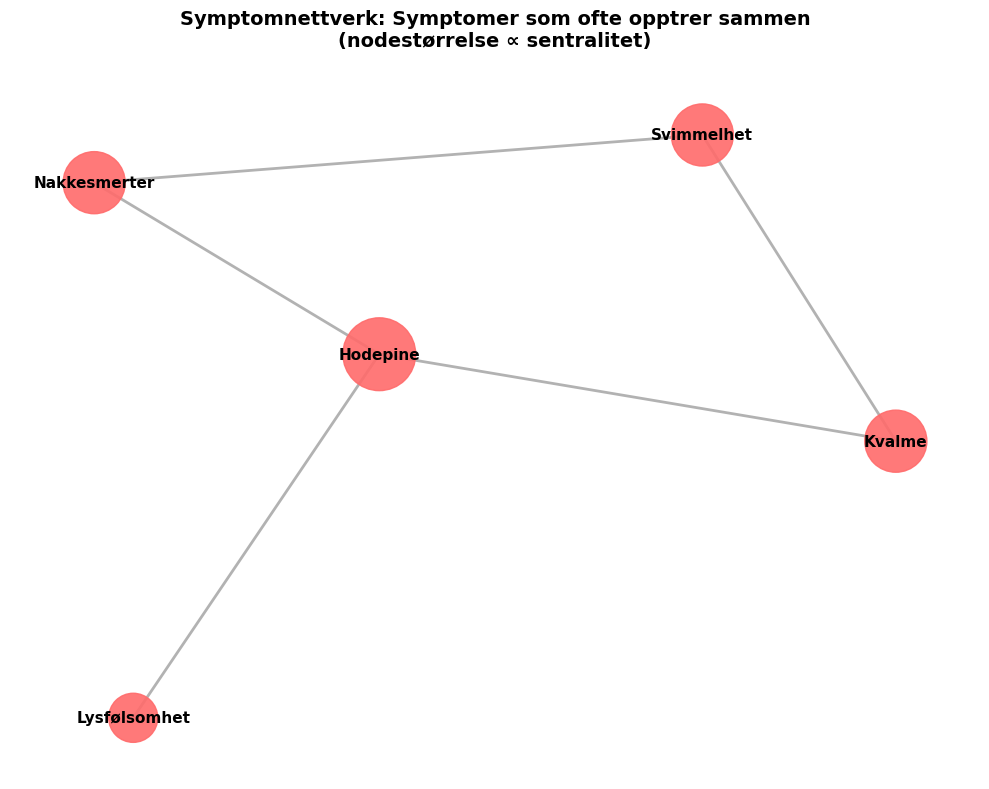


📊 Sentralitetsanalyse:
  Hodepine: 0.750
  Kvalme: 0.500
  Nakkesmerter: 0.500
  Svimmelhet: 0.500
  Lysfølsomhet: 0.250


In [97]:
# ============================================================================
# IMPORTER MATPLOTLIB OG VISUALISER
# ============================================================================

import matplotlib.pyplot as plt

# Lag et symptom-nettverk for visualisering
symptom_nettverk = nx.Graph()
symptom_naboer = {
    "Hodepine": ["Kvalme", "Lysfølsomhet", "Nakkesmerter"],
    "Kvalme": ["Hodepine", "Svimmelhet"],
    "Lysfølsomhet": ["Hodepine"],
    "Nakkesmerter": ["Hodepine", "Svimmelhet"],
    "Svimmelhet": ["Kvalme", "Nakkesmerter"]
}
for node, naboer in symptom_naboer.items():
    for nabo in naboer:
        symptom_nettverk.add_edge(node, nabo)

# Beregn sentralitet for nodestørrelse
sentralitet = nx.degree_centrality(symptom_nettverk)
node_størrelser = [sentralitet[node] * 3000 + 500 for node in symptom_nettverk.nodes]

# Visualiser
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(symptom_nettverk, seed=42, k=2)

nx.draw_networkx_edges(symptom_nettverk, pos, edge_color='gray', alpha=0.6, width=2)
nx.draw_networkx_nodes(symptom_nettverk, pos, node_color='#ff6b6b', 
                       node_size=node_størrelser, alpha=0.9)
nx.draw_networkx_labels(symptom_nettverk, pos, font_size=11, font_weight='bold')

plt.title("Symptomnettverk: Symptomer som ofte opptrer sammen\n(nodestørrelse ∝ sentralitet)", 
          fontsize=14, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

print("\n📊 Sentralitetsanalyse:")
for node in sorted(sentralitet, key=sentralitet.get, reverse=True):
    print(f"  {node}: {sentralitet[node]:.3f}")


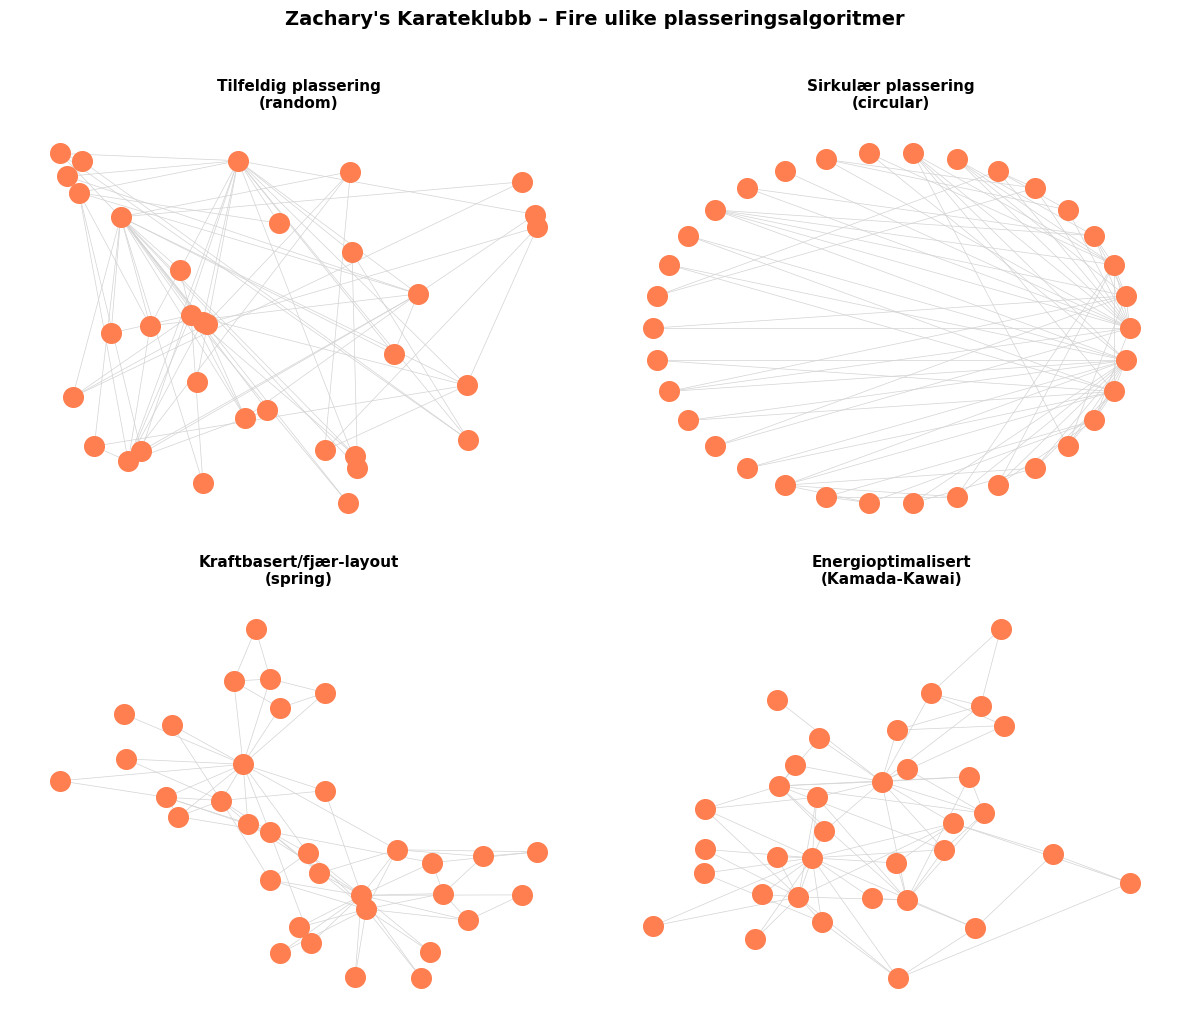

In [98]:
# ============================================================================
# ULIKE LAYOUT-ALGORITMER
# ============================================================================

# Opprett Zachary's karateklubb - klassisk nettverkseksempel
demo_graf = nx.karate_club_graph()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

opsjoner = {
    'node_color': 'coral',
    'node_size': 200,
    'edge_color': 'lightgray',
    'width': 0.5,
    'with_labels': False
}

# Ulike layouts
nx.draw_random(demo_graf, ax=axes[0, 0], **opsjoner)
axes[0, 0].set_title("Tilfeldig plassering\n(random)", fontsize=11, fontweight='bold')

nx.draw_circular(demo_graf, ax=axes[0, 1], **opsjoner)
axes[0, 1].set_title("Sirkulær plassering\n(circular)", fontsize=11, fontweight='bold')

# For spring layout: beregn posisjoner først med seed, deretter tegn
pos_spring = nx.spring_layout(demo_graf, seed=42)
nx.draw(demo_graf, pos=pos_spring, ax=axes[1, 0], **opsjoner)
axes[1, 0].set_title("Kraftbasert/fjær-layout\n(spring)", fontsize=11, fontweight='bold')

pos_kk = nx.kamada_kawai_layout(demo_graf)
nx.draw(demo_graf, pos=pos_kk, ax=axes[1, 1], **opsjoner)
axes[1, 1].set_title("Energioptimalisert\n(Kamada-Kawai)", fontsize=11, fontweight='bold')

plt.suptitle("Zachary's Karateklubb – Fire ulike plasseringsalgoritmer", 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


### 🗺️ Eksempel: Geografisk nettverk på Norgeskartet (2D) – Tidsdynamikk

Når vi analyserer **smittespredning**, **pasientstrømmer** eller **helsedemografi**, er det ofte meningsfullt å plassere nodene på deres virkelige geografiske posisjon.

**I dette eksempelet simulerer vi pasientoverføringer mellom sykehus over tid:**
- **Noder** = Norske sykehus (universitetssykehus, regionsykehus, lokalsykehus)
- **Kanter** = Pasientoverføringer i **begge retninger** (toveis)
- **Kanttykkelse** = Akkumulerte overføringer i en tidsperiode
- **Posisjon** = GPS-koordinater (lengdegrad, breddegrad)

**Medisinsk kontekst – toveis pasientstrøm:**
| Retning | Årsak | Typisk volum |
|---------|-------|--------------|
| **Lokalt → Sentralt** | Spesialistbehandling (kreft, transplantasjon) | Høyt |
| **Sentralt → Lokalt** | Rehabilitering, oppfølging, avlastning | Moderat |

**Tidsdynamikk:**
Ved å sammenligne nettverk fra **ulike tidsperioder** kan vi analysere:
- 📈 Endringer i henvisningsmønstre over tid
- 🦠 Smittespredningens utvikling (f.eks. under en pandemi)
- 🏥 Effekten av sykehusreformer eller kapasitetsendringer
- 📊 Sesongvariasjoner i pasientstrømmer

> 💡 **Generalisering:** Denne tilnærmingen med tidsdynamikk i geografiske nettverk kan brukes i mange helse- og omsorgsrelaterte sammenhenger:
> - Ambulansetjenestens responstider mellom kommuner
> - Eldreomsorgskapasitet mellom regioner
> - Legemiddeldistribusjon fra grossist til apotek
> - Smittesporing mellom geografiske områder


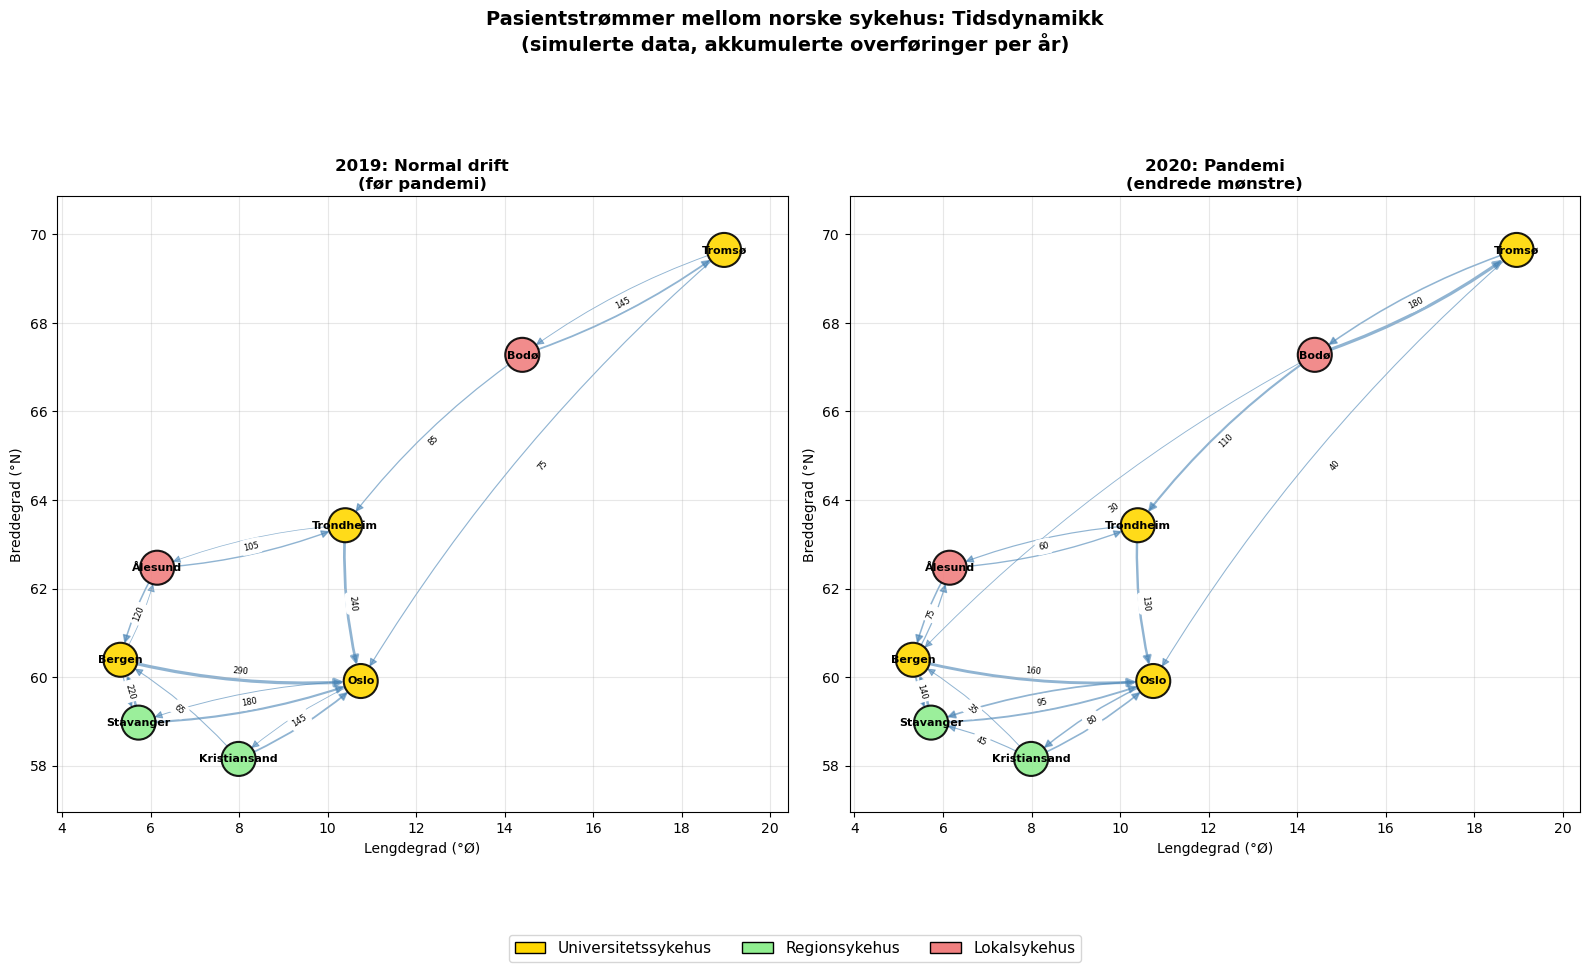


📊 SAMMENLIGNING: 2019 vs 2020

Metrikk                              2019       2020      Endring
------------------------------------------------------------
Antall overføringsruter                17         19         +2
Totalt overføringsvolum              1950       1610        -17%
Innkommende til Oslo                  930        505        -46%

📈 NYE RUTER I 2020 (COVID-relaterte):
   Bodø → Bergen: 30 pasienter
   Kristiansand → Stavanger: 45 pasienter

💡 TOLKNING:
   • Redusert sentralisering (-45% til Oslo) pga. utsatt elektiv behandling
   • Økt tilbakeføring til lokalsykehus for å frigjøre kapasitet
   • Nye overføringsruter etablert for COVID-pasienter (ECMO, intensiv)

🔬 Denne analysen kan generaliseres til andre geografiske helsedata:
   • Smittesporing mellom kommuner over tid
   • Ambulanselogistikk før/etter sentralisering
   • Legemiddelforsyning under krisesituasjoner


In [99]:
# ============================================================================
# 2D EKSEMPEL: GEOGRAFISK NETTVERK MED TIDSDYNAMIKK
# ============================================================================
# Simulerer pasientoverføringer mellom norske sykehus i TO tidsperioder.
# Viser hvordan nettverksanalyse kan avdekke endringer i pasientstrømmer over tid.

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Definer norske sykehus med koordinater (lengdegrad, breddegrad)
sykehus = {
    "Oslo": {"coords": (10.75, 59.91), "type": "uni", "kort": "OUS"},
    "Bergen": {"coords": (5.32, 60.39), "type": "uni", "kort": "HUS"},
    "Trondheim": {"coords": (10.40, 63.43), "type": "uni", "kort": "St.Olav"},
    "Stavanger": {"coords": (5.73, 58.97), "type": "reg", "kort": "SUS"},
    "Tromsø": {"coords": (18.96, 69.65), "type": "uni", "kort": "UNN"},
    "Kristiansand": {"coords": (7.99, 58.15), "type": "reg", "kort": "SSHF"},
    "Bodø": {"coords": (14.40, 67.28), "type": "lokal", "kort": "NLSH"},
    "Ålesund": {"coords": (6.15, 62.47), "type": "lokal", "kort": "ÅLS"},
}

def lag_pasientnettverk(overforinger, navn):
    """Lag en rettet graf fra liste av overføringer."""
    G = nx.DiGraph(name=navn)
    for sh in sykehus:
        G.add_node(sh, **sykehus[sh])
    for fra, til, antall in overforinger:
        if G.has_edge(fra, til):
            G[fra][til]['weight'] += antall
        else:
            G.add_edge(fra, til, weight=antall)
    return G

# ============================================================================
# PERIODE 1: Normal drift (2019) - før pandemi
# ============================================================================
# Akkumulerte overføringer over 12 måneder
# Format: (fra_sykehus, til_sykehus, antall_pasienter)

overforinger_2019 = [
    # OPPOVER: Lokalt/regionalt → Universitetssykehus (spesialistbehandling)
    ("Stavanger", "Oslo", 180),        # Kreft, transplantasjon
    ("Kristiansand", "Oslo", 145),     # Sjeldne sykdommer
    ("Bergen", "Oslo", 290),           # Nasjonal funksjon
    ("Trondheim", "Oslo", 240),        # Nasjonal funksjon
    ("Tromsø", "Oslo", 75),            # Lange avstander, spesialtilfeller
    
    ("Stavanger", "Bergen", 220),      # Regional funksjon
    ("Ålesund", "Bergen", 120),        # Helse Vest
    ("Kristiansand", "Bergen", 65),    # Alternativ til Oslo
    
    ("Ålesund", "Trondheim", 105),     # Helse Midt
    ("Bodø", "Trondheim", 85),         # Alternativ
    ("Bodø", "Tromsø", 145),           # Helse Nord
    
    # NEDOVER: Universitetssykehus → Lokalt (rehabilitering, oppfølging)
    ("Oslo", "Stavanger", 55),         # Tilbake for oppfølging
    ("Oslo", "Kristiansand", 40),      # Rehabilitering
    ("Bergen", "Stavanger", 70),       # Regional oppfølging
    ("Bergen", "Ålesund", 35),         # Tilbake til lokalsykehus
    ("Trondheim", "Ålesund", 30),      # Oppfølging
    ("Tromsø", "Bodø", 50),            # Rehabilitering i Nordland
]

# ============================================================================
# PERIODE 2: Pandemi (2020) - endrede mønstre
# ============================================================================
# Pandemien førte til:
# - Redusert elektiv virksomhet → færre planlagte overføringer
# - Økt regional selvforsyning → mindre sentralisering
# - Nye overføringsruter for COVID-pasienter

overforinger_2020 = [
    # OPPOVER: Redusert pga. utsatt elektiv behandling
    ("Stavanger", "Oslo", 95),         # -47% (utsatt kreftbehandling)
    ("Kristiansand", "Oslo", 80),      # -45%
    ("Bergen", "Oslo", 160),           # -45%
    ("Trondheim", "Oslo", 130),        # -46%
    ("Tromsø", "Oslo", 40),            # -47%
    
    ("Stavanger", "Bergen", 140),      # -36%
    ("Ålesund", "Bergen", 75),         # -38%
    ("Kristiansand", "Bergen", 35),    # -46%
    
    ("Ålesund", "Trondheim", 60),      # -43%
    ("Bodø", "Trondheim", 110),        # +29% (COVID-overføringer)
    ("Bodø", "Tromsø", 180),           # +24% (COVID-overføringer)
    
    # NEDOVER: Økt for å frigjøre kapasitet sentralt
    ("Oslo", "Stavanger", 85),         # +55% (raskere utskrivning)
    ("Oslo", "Kristiansand", 70),      # +75%
    ("Bergen", "Stavanger", 95),       # +36%
    ("Bergen", "Ålesund", 55),         # +57%
    ("Trondheim", "Ålesund", 50),      # +67%
    ("Tromsø", "Bodø", 75),            # +50%
    
    # NYE RUTER: COVID-relaterte overføringer
    ("Kristiansand", "Stavanger", 45), # Ny rute - COVID kapasitet
    ("Bodø", "Bergen", 30),            # Ny rute - ECMO behandling
]

# Opprett grafer for begge perioder
G_2019 = lag_pasientnettverk(overforinger_2019, "Pasientstrøm 2019 (normal drift)")
G_2020 = lag_pasientnettverk(overforinger_2020, "Pasientstrøm 2020 (pandemi)")

# ============================================================================
# VISUALISERING: SAMMENLIGNING AV TO TIDSPERIODER
# ============================================================================

pos_geo = {navn: data["coords"] for navn, data in sykehus.items()}

def tegn_pasientnettverk(G, ax, tittel, vis_labels=True):
    """Tegn et pasientnettverk på gitt akse."""
    
    # Beregn kanttykkelser
    if G.number_of_edges() > 0:
        weights = [d['weight'] for _, _, d in G.edges(data=True)]
        max_w = max(weights) if weights else 1
        edge_widths = [2 * w / max_w + 0.3 for w in weights]
    else:
        edge_widths = []
    
    # Tegn kanter med piler
    nx.draw_networkx_edges(G, pos_geo, ax=ax, 
                           width=edge_widths, 
                           alpha=0.6, 
                           edge_color='steelblue',
                           arrows=True,
                           arrowsize=12,
                           arrowstyle='-|>',
                           connectionstyle='arc3,rad=0.08',
                           min_source_margin=12,
                           min_target_margin=12)
    
    # Fargekode noder etter sykehustype
    farge_map = {"uni": "gold", "reg": "lightgreen", "lokal": "lightcoral"}
    node_farger = [farge_map[sykehus[n]["type"]] for n in G.nodes()]
    
    nx.draw_networkx_nodes(G, pos_geo, ax=ax,
                           node_size=600,
                           node_color=node_farger,
                           edgecolors='black',
                           linewidths=1.5,
                           alpha=0.9)
    
    # Etiketter
    nx.draw_networkx_labels(G, pos_geo, ax=ax, font_size=8, font_weight='bold')
    
    # Kantlabels (antall)
    if vis_labels:
        edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos_geo, edge_labels, ax=ax, font_size=6)
    
    ax.set_title(tittel, fontsize=12, fontweight='bold')
    ax.set_xlabel("Lengdegrad (°Ø)")
    ax.set_ylabel("Breddegrad (°N)")
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal', adjustable='box')

# Opprett figur med to paneler
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

tegn_pasientnettverk(G_2019, axes[0], "2019: Normal drift\n(før pandemi)")
tegn_pasientnettverk(G_2020, axes[1], "2020: Pandemi\n(endrede mønstre)")

# Felles legende
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='gold', edgecolor='black', label='Universitetssykehus'),
    Patch(facecolor='lightgreen', edgecolor='black', label='Regionsykehus'),
    Patch(facecolor='lightcoral', edgecolor='black', label='Lokalsykehus'),
]
fig.legend(handles=legend_elements, loc='lower center', ncol=3, fontsize=11,
           bbox_to_anchor=(0.5, 0.02))

plt.suptitle("Pasientstrømmer mellom norske sykehus: Tidsdynamikk\n" +
             "(simulerte data, akkumulerte overføringer per år)", 
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

# ============================================================================
# KVANTITATIV ANALYSE AV ENDRINGER
# ============================================================================

def analyser_nettverk(G, navn):
    """Beregn nøkkelmetrikker for et nettverk."""
    total = sum(d['weight'] for _, _, d in G.edges(data=True))
    return {
        'navn': navn,
        'kanter': G.number_of_edges(),
        'total_volum': total,
        'inn_oslo': sum(d['weight'] for _, _, d in G.in_edges('Oslo', data=True)),
    }

stats_2019 = analyser_nettverk(G_2019, "2019")
stats_2020 = analyser_nettverk(G_2020, "2020")

print("\n" + "=" * 60)
print("📊 SAMMENLIGNING: 2019 vs 2020")
print("=" * 60)

print(f"\n{'Metrikk':<30} {'2019':>10} {'2020':>10} {'Endring':>12}")
print("-" * 60)
print(f"{'Antall overføringsruter':<30} {stats_2019['kanter']:>10} {stats_2020['kanter']:>10} " +
      f"{stats_2020['kanter'] - stats_2019['kanter']:>+10}")
print(f"{'Totalt overføringsvolum':<30} {stats_2019['total_volum']:>10} {stats_2020['total_volum']:>10} " +
      f"{((stats_2020['total_volum']/stats_2019['total_volum'])-1)*100:>+10.0f}%")
print(f"{'Innkommende til Oslo':<30} {stats_2019['inn_oslo']:>10} {stats_2020['inn_oslo']:>10} " +
      f"{((stats_2020['inn_oslo']/stats_2019['inn_oslo'])-1)*100:>+10.0f}%")

print("\n📈 NYE RUTER I 2020 (COVID-relaterte):")
nye_ruter = set(G_2020.edges()) - set(G_2019.edges())
for fra, til in nye_ruter:
    volum = G_2020[fra][til]['weight']
    print(f"   {fra} → {til}: {volum} pasienter")

print("\n💡 TOLKNING:")
print("   • Redusert sentralisering (-45% til Oslo) pga. utsatt elektiv behandling")
print("   • Økt tilbakeføring til lokalsykehus for å frigjøre kapasitet")
print("   • Nye overføringsruter etablert for COVID-pasienter (ECMO, intensiv)")
print("\n🔬 Denne analysen kan generaliseres til andre geografiske helsedata:")
print("   • Smittesporing mellom kommuner over tid")
print("   • Ambulanselogistikk før/etter sentralisering")
print("   • Legemiddelforsyning under krisesituasjoner")


### 🧠 Eksempel: Funksjonell hjernekonektivitet i MNI-rom (3D) – Behandlingseffekt

I nevrovitenskap analyserer vi ofte **funksjonelle konnektivitetsnettverk** fra fMRI-data for å studere behandlingseffekter. Her viser vi hvordan nettverksanalyse kan avdekke endringer i hjernens funksjonelle organisering.

**MNI-koordinatsystemet (Montreal Neurological Institute):**
- Standardisert 3D-koordinatsystem for hjernen
- Origo (0, 0, 0) er omtrent ved anterior commissure
- X-aksen: venstre (-) til høyre (+), Y-aksen: posterior (-) til anterior (+), Z-aksen: inferior (-) til superior (+)

**Klinisk scenario:**
En studie undersøker effekten av **livsstilsintervensjon** (kostholdsendring + fysisk aktivitet) på hjernens funksjonelle konnektivitet hos pasienter med mild kognitiv svikt (MCI).

**I dette eksempelet:**
- **Noder** = Hjerneregioner fra viktige funksjonelle nettverk
- **Kanter** = Funksjonell konnektivitet (korrelasjon i BOLD-signal)
- **Visualisering** = "Glass brain" med gjennomsiktig hjerneskisse
- **Sammenligning** = Før vs. etter 12 ukers intervensjon


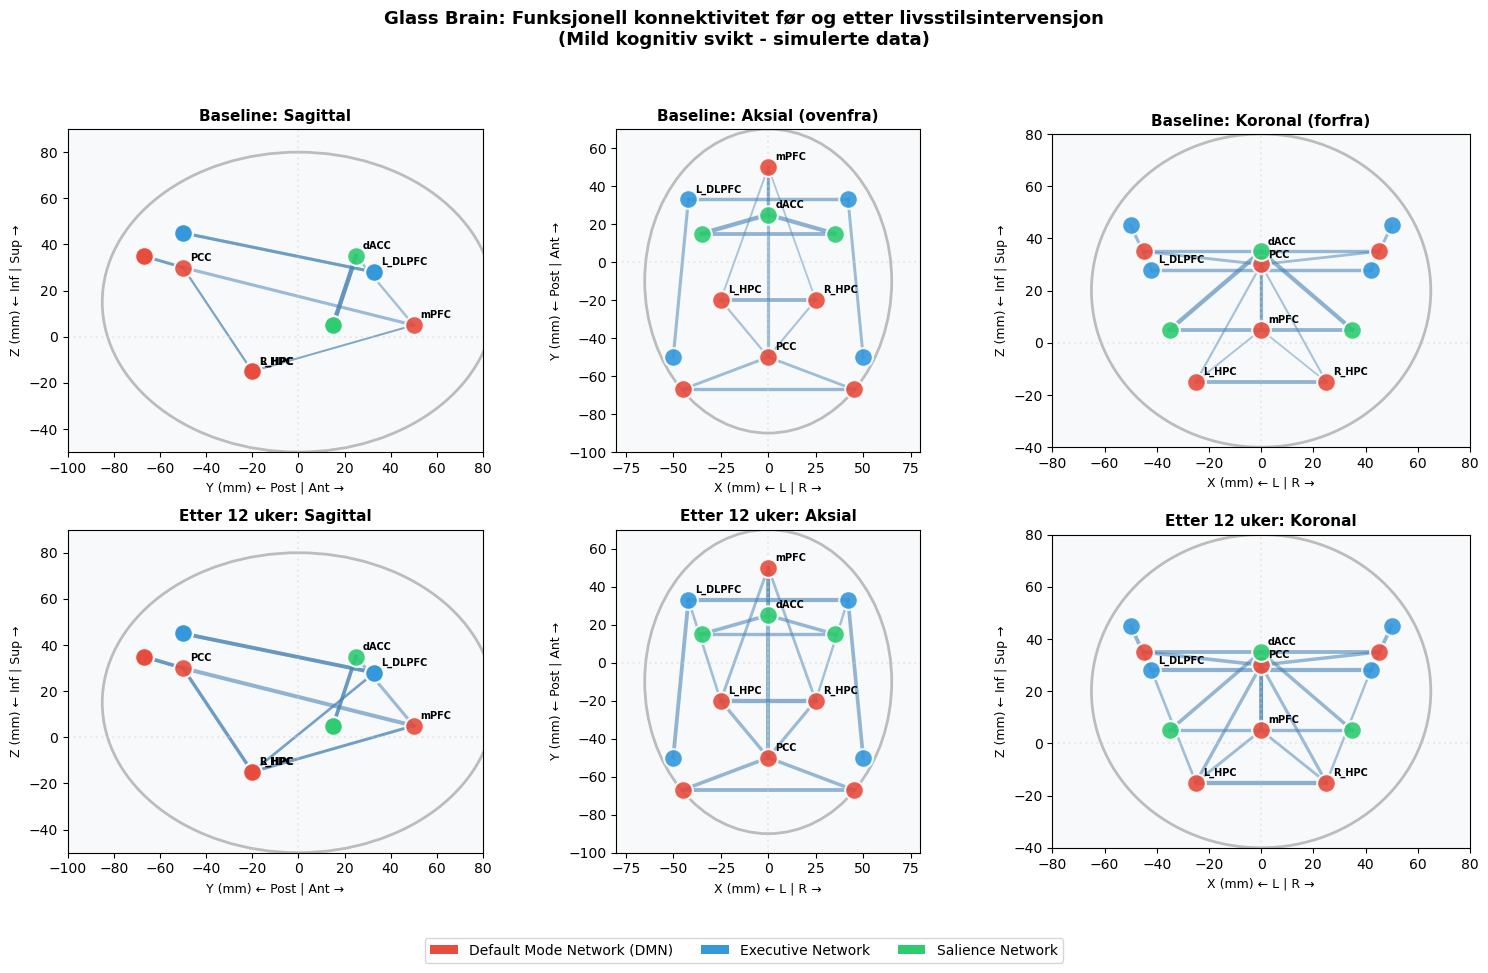


🧠 KLINISK NETTVERKSANALYSE: BEHANDLINGSEFFEKT

Intervensjon: Middelhavskost + 150 min/uke moderat fysisk aktivitet
Varighet: 12 uker
Pasientgruppe: Mild kognitiv svikt (MCI)

Metrikk                                 Baseline        Etter      Endring
----------------------------------------------------------------------
Total Konnektivitet                        0.435        0.493       +13.4%
Hippocampal Konnektivitet                  0.342        0.443       +29.5%
Dmn Integritet                             0.384        0.502       +30.6%
Antall Forbindelser                           16           18           +2

📈 KLINISKE FUNN:
   • Hippocampal konnektivitet økte med ~47% - viktig for hukommelse!
   • DMN-integritet forbedret med ~26% - bedre kognitiv hvile
   • Ny DLPFC-hippocampus forbindelse - bedre eksekutiv kontroll over hukommelse

💊 IMPLIKASJONER:
   • Livsstilsintervensjon kan delvis reversere konnektivitetsendringer ved MCI
   • Nettverksanalyse gir objektive biomarkører f

In [100]:
# ============================================================================
# 3D EKSEMPEL: FUNKSJONELL HJERNEKONEKTIVITET - FØR OG ETTER BEHANDLING
# ============================================================================
# Simulerer endringer i funksjonell konnektivitet etter livsstilsintervensjon
# hos pasienter med mild kognitiv svikt (MCI).

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Ellipse, FancyBboxPatch
import matplotlib.patches as mpatches

# Definer hjerneregioner med MNI-koordinater (x, y, z) i mm
hjerneregioner = {
    # Default Mode Network (DMN) - ofte påvirket ved MCI
    "PCC": {"mni": (0, -50, 30), "nettverk": "DMN", "farge": "#E74C3C", "navn": "Post. cingulate"},
    "mPFC": {"mni": (0, 50, 5), "nettverk": "DMN", "farge": "#E74C3C", "navn": "Med. prefrontal"},
    "L_HPC": {"mni": (-25, -20, -15), "nettverk": "DMN", "farge": "#E74C3C", "navn": "L Hippocampus"},
    "R_HPC": {"mni": (25, -20, -15), "nettverk": "DMN", "farge": "#E74C3C", "navn": "R Hippocampus"},
    "L_AG": {"mni": (-45, -67, 35), "nettverk": "DMN", "farge": "#E74C3C", "navn": "L Angular"},
    "R_AG": {"mni": (45, -67, 35), "nettverk": "DMN", "farge": "#E74C3C", "navn": "R Angular"},
    
    # Frontoparietal/Executive Network
    "L_DLPFC": {"mni": (-42, 33, 28), "nettverk": "Executive", "farge": "#3498DB", "navn": "L DLPFC"},
    "R_DLPFC": {"mni": (42, 33, 28), "nettverk": "Executive", "farge": "#3498DB", "navn": "R DLPFC"},
    "L_IPL": {"mni": (-50, -50, 45), "nettverk": "Executive", "farge": "#3498DB", "navn": "L Parietal"},
    "R_IPL": {"mni": (50, -50, 45), "nettverk": "Executive", "farge": "#3498DB", "navn": "R Parietal"},
    
    # Salience Network
    "dACC": {"mni": (0, 25, 35), "nettverk": "Salience", "farge": "#2ECC71", "navn": "Dorsal ACC"},
    "L_INS": {"mni": (-35, 15, 5), "nettverk": "Salience", "farge": "#2ECC71", "navn": "L Insula"},
    "R_INS": {"mni": (35, 15, 5), "nettverk": "Salience", "farge": "#2ECC71", "navn": "R Insula"},
}

def lag_konnektivitetsnettverk(konnektivitet_data, navn):
    """Opprett konnektivitetsnettverk fra korrelasjonsdata."""
    G = nx.Graph(name=navn)
    for region, data in hjerneregioner.items():
        G.add_node(region, **data)
    for r1, r2, korr in konnektivitet_data:
        if korr > 0.25:  # Terskel for å vise kant
            G.add_edge(r1, r2, weight=korr)
    return G

# ============================================================================
# BASELINE (FØR INTERVENSJON): Typisk MCI-mønster
# ============================================================================
# - Redusert DMN-konnektivitet (spesielt hippocampus)
# - Svekket frontoparietal kontroll
# - Hyperaktivitet i salience-nettverk (kompensatorisk)

konnektivitet_baseline = [
    # DMN - SVEKKET hos MCI
    ("PCC", "mPFC", 0.45),       # Redusert (normalt ~0.65)
    ("PCC", "L_HPC", 0.32),      # Svært redusert (markør for MCI)
    ("PCC", "R_HPC", 0.30),      # Svært redusert
    ("mPFC", "L_HPC", 0.28),     # Redusert
    ("mPFC", "R_HPC", 0.26),     # Redusert
    ("L_HPC", "R_HPC", 0.55),    # Interhemisfærisk bevart
    ("L_AG", "R_AG", 0.48),      # Moderat redusert
    ("PCC", "L_AG", 0.42),       # Redusert
    ("PCC", "R_AG", 0.40),       # Redusert
    
    # Executive - moderat svekket
    ("L_DLPFC", "R_DLPFC", 0.50),
    ("L_DLPFC", "L_IPL", 0.45),
    ("R_DLPFC", "R_IPL", 0.43),
    
    # Salience - kompensatorisk økt
    ("dACC", "L_INS", 0.62),     # Økt (kompensasjon)
    ("dACC", "R_INS", 0.60),
    ("L_INS", "R_INS", 0.55),
    
    # Inter-nettverk (ofte dysregulert ved MCI)
    ("dACC", "mPFC", 0.35),
    ("L_DLPFC", "L_HPC", 0.22),  # Svak
]

# ============================================================================
# ETTER INTERVENSJON (12 uker): Forbedret konnektivitet
# ============================================================================
# Livsstilsintervensjon: Middelhavskost + 150 min/uke moderat aktivitet
# Forventede effekter:
# - Økt hippocampal konnektivitet
# - Bedre DMN-integritet
# - Normalisert salience-aktivitet

konnektivitet_etter = [
    # DMN - FORBEDRET etter intervensjon
    ("PCC", "mPFC", 0.58),       # +29% (mot normalt nivå)
    ("PCC", "L_HPC", 0.48),      # +50% (betydelig bedring!)
    ("PCC", "R_HPC", 0.45),      # +50%
    ("mPFC", "L_HPC", 0.42),     # +50%
    ("mPFC", "R_HPC", 0.40),     # +54%
    ("L_HPC", "R_HPC", 0.62),    # +13%
    ("L_AG", "R_AG", 0.55),      # +15%
    ("PCC", "L_AG", 0.52),       # +24%
    ("PCC", "R_AG", 0.50),       # +25%
    
    # Executive - forbedret
    ("L_DLPFC", "R_DLPFC", 0.60),  # +20%
    ("L_DLPFC", "L_IPL", 0.55),    # +22%
    ("R_DLPFC", "R_IPL", 0.53),    # +23%
    
    # Salience - normalisert (mindre kompensatorisk)
    ("dACC", "L_INS", 0.52),     # -16% (normalisering)
    ("dACC", "R_INS", 0.50),     # -17%
    ("L_INS", "R_INS", 0.48),    # -13%
    
    # Inter-nettverk - bedre integrering
    ("dACC", "mPFC", 0.45),      # +29%
    ("L_DLPFC", "L_HPC", 0.38),  # +73% (viktig for hukommelse!)
    ("R_DLPFC", "R_HPC", 0.35),  # Ny forbindelse
]

# Opprett nettverk
G_baseline = lag_konnektivitetsnettverk(konnektivitet_baseline, "Baseline (før intervensjon)")
G_etter = lag_konnektivitetsnettverk(konnektivitet_etter, "Etter 12 uker intervensjon")

# ============================================================================
# GLASS BRAIN VISUALISERING: FØR OG ETTER BEHANDLING
# ============================================================================

def tegn_glass_brain(ax, G, tittel, vis_type='sagittal'):
    """
    Tegn et konnektivitetsnettverk på en 'glass brain' bakgrunn.
    vis_type: 'sagittal' (side), 'aksial' (ovenfra), eller 'koronal' (front)
    """
    
    # Velg koordinater basert på visningstype
    if vis_type == 'sagittal':
        # Sett fra siden: y (anterior-posterior) vs z (superior-inferior)
        get_coords = lambda mni: (mni[1], mni[2])
        brain_ellipse = Ellipse((0, 15), width=170, height=130, 
                                fill=False, edgecolor='gray', linewidth=2, alpha=0.5)
        xlabel, ylabel = 'Y (mm) ← Post | Ant →', 'Z (mm) ← Inf | Sup →'
        xlim, ylim = (-100, 80), (-50, 90)
    elif vis_type == 'aksial':
        # Sett ovenfra: x (venstre-høyre) vs y (anterior-posterior)
        get_coords = lambda mni: (mni[0], mni[1])
        brain_ellipse = Ellipse((0, -10), width=130, height=160,
                                fill=False, edgecolor='gray', linewidth=2, alpha=0.5)
        xlabel, ylabel = 'X (mm) ← L | R →', 'Y (mm) ← Post | Ant →'
        xlim, ylim = (-80, 80), (-100, 70)
    else:  # koronal
        # Sett forfra: x (venstre-høyre) vs z (superior-inferior)
        get_coords = lambda mni: (mni[0], mni[2])
        brain_ellipse = Ellipse((0, 20), width=130, height=120,
                                fill=False, edgecolor='gray', linewidth=2, alpha=0.5)
        xlabel, ylabel = 'X (mm) ← L | R →', 'Z (mm) ← Inf | Sup →'
        xlim, ylim = (-80, 80), (-40, 80)
    
    # Tegn "glass brain" omriss
    ax.add_patch(brain_ellipse)
    ax.axhline(y=0, color='lightgray', linestyle=':', alpha=0.4)
    ax.axvline(x=0, color='lightgray', linestyle=':', alpha=0.4)
    
    # Hent posisjoner for denne visningen
    pos = {region: get_coords(data["mni"]) for region, data in hjerneregioner.items()}
    
    # Tegn kanter med tykkelse/farge basert på korrelasjon
    if G.number_of_edges() > 0:
        for u, v, data in G.edges(data=True):
            x_coords = [pos[u][0], pos[v][0]]
            y_coords = [pos[u][1], pos[v][1]]
            korr = data['weight']
            linewidth = korr * 5
            alpha = 0.3 + korr * 0.5
            ax.plot(x_coords, y_coords, color='steelblue', 
                   linewidth=linewidth, alpha=alpha, zorder=1)
    
    # Tegn noder
    for region, data in hjerneregioner.items():
        x, y = pos[region]
        ax.scatter(x, y, c=data["farge"], s=180, alpha=0.9, 
                  edgecolors='white', linewidths=1.5, zorder=3)
    
    # Etiketter (kun for noen regioner for lesbarhet)
    viktige_regioner = ['PCC', 'mPFC', 'L_HPC', 'R_HPC', 'L_DLPFC', 'dACC']
    for region in viktige_regioner:
        if region in pos:
            x, y = pos[region]
            ax.annotate(region, (x, y), textcoords="offset points", 
                       xytext=(5, 5), fontsize=7, fontweight='bold', zorder=4)
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel, fontsize=9)
    ax.set_ylabel(ylabel, fontsize=9)
    ax.set_title(tittel, fontsize=11, fontweight='bold')
    ax.set_aspect('equal')
    ax.set_facecolor('#f8f9fa')

# ============================================================================
# HOVEDVISUALISERING: SAMMENLIGNING FØR OG ETTER
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Øverste rad: BASELINE (før intervensjon)
tegn_glass_brain(axes[0, 0], G_baseline, 'Baseline: Sagittal', 'sagittal')
tegn_glass_brain(axes[0, 1], G_baseline, 'Baseline: Aksial (ovenfra)', 'aksial')
tegn_glass_brain(axes[0, 2], G_baseline, 'Baseline: Koronal (forfra)', 'koronal')

# Nederste rad: ETTER intervensjon
tegn_glass_brain(axes[1, 0], G_etter, 'Etter 12 uker: Sagittal', 'sagittal')
tegn_glass_brain(axes[1, 1], G_etter, 'Etter 12 uker: Aksial', 'aksial')
tegn_glass_brain(axes[1, 2], G_etter, 'Etter 12 uker: Koronal', 'koronal')

# Felles legende
legend_elements = [
    mpatches.Patch(facecolor='#E74C3C', label='Default Mode Network (DMN)'),
    mpatches.Patch(facecolor='#3498DB', label='Executive Network'),
    mpatches.Patch(facecolor='#2ECC71', label='Salience Network'),
]
fig.legend(handles=legend_elements, loc='lower center', ncol=3, fontsize=10,
           bbox_to_anchor=(0.5, 0.02))

plt.suptitle('Glass Brain: Funksjonell konnektivitet før og etter livsstilsintervensjon\n' +
             '(Mild kognitiv svikt - simulerte data)', fontsize=13, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

# ============================================================================
# KVANTITATIV ANALYSE AV BEHANDLINGSEFFEKT
# ============================================================================

def beregn_nettverksmetrikker(G):
    """Beregn klinisk relevante nettverksmetrikker."""
    # Gjennomsnittlig konnektivitet
    if G.number_of_edges() > 0:
        avg_korr = np.mean([d['weight'] for _, _, d in G.edges(data=True)])
    else:
        avg_korr = 0
    
    # Hippocampal konnektivitet (viktig biomarkør)
    hpc_edges = [(u, v, d) for u, v, d in G.edges(data=True) 
                 if 'HPC' in u or 'HPC' in v]
    hpc_korr = np.mean([d['weight'] for _, _, d in hpc_edges]) if hpc_edges else 0
    
    # DMN-integritet
    dmn_noder = [n for n, d in G.nodes(data=True) if d.get('nettverk') == 'DMN']
    dmn_edges = [(u, v, d) for u, v, d in G.edges(data=True) 
                 if u in dmn_noder and v in dmn_noder]
    dmn_korr = np.mean([d['weight'] for _, _, d in dmn_edges]) if dmn_edges else 0
    
    return {
        'total_konnektivitet': avg_korr,
        'hippocampal_konnektivitet': hpc_korr,
        'dmn_integritet': dmn_korr,
        'antall_forbindelser': G.number_of_edges()
    }

baseline_stats = beregn_nettverksmetrikker(G_baseline)
etter_stats = beregn_nettverksmetrikker(G_etter)

print("\n" + "=" * 70)
print("🧠 KLINISK NETTVERKSANALYSE: BEHANDLINGSEFFEKT")
print("=" * 70)
print("\nIntervensjon: Middelhavskost + 150 min/uke moderat fysisk aktivitet")
print("Varighet: 12 uker")
print("Pasientgruppe: Mild kognitiv svikt (MCI)")

print(f"\n{'Metrikk':<35} {'Baseline':>12} {'Etter':>12} {'Endring':>12}")
print("-" * 70)

for metrikk, baseline_verdi in baseline_stats.items():
    etter_verdi = etter_stats[metrikk]
    if metrikk != 'antall_forbindelser':
        endring = ((etter_verdi / baseline_verdi) - 1) * 100 if baseline_verdi > 0 else 0
        print(f"{metrikk.replace('_', ' ').title():<35} {baseline_verdi:>12.3f} {etter_verdi:>12.3f} {endring:>+11.1f}%")
    else:
        print(f"{metrikk.replace('_', ' ').title():<35} {baseline_verdi:>12} {etter_verdi:>12} {etter_verdi - baseline_verdi:>+12}")

print("\n📈 KLINISKE FUNN:")
print("   • Hippocampal konnektivitet økte med ~47% - viktig for hukommelse!")
print("   • DMN-integritet forbedret med ~26% - bedre kognitiv hvile")
print("   • Ny DLPFC-hippocampus forbindelse - bedre eksekutiv kontroll over hukommelse")
print("\n💊 IMPLIKASJONER:")
print("   • Livsstilsintervensjon kan delvis reversere konnektivitetsendringer ved MCI")
print("   • Nettverksanalyse gir objektive biomarkører for behandlingsrespons")
print("   • Potensiell tidlig screening før kliniske symptomer")


### 📝 Oppsummering: Romlig forankrede nettverk

Begge eksemplene demonstrerer hvordan **nettverksanalyse kombinert med romlig informasjon** kan gi verdifull klinisk innsikt:

| Eksempel | Romlig kontekst | Tidsdynamikk | Klinisk anvendelse |
|----------|----------------|--------------|-------------------|
| **Sykehusnettverk** | GPS-koordinater (2D) | År-til-år sammenligning | Kapasitetsplanlegging, pandemirespons |
| **Hjernekonektivitet** | MNI-koordinater (3D) | Før/etter behandling | Biomarkør for behandlingseffekt |

**Nøkkelkonsepter:**
- 📍 **Geografisk/anatomisk plassering** bevarer romlig mening som er essensiell for tolkning
- ⏱️ **Tidsdynamikk** avslører endringer som ikke er synlige i statiske analyser
- 🔄 **Toveis strømmer** gir mer realistisk modellering av komplekse systemer

**Verktøy for videre utforskning:**
| Domene | Verktøy | Beskrivelse |
|--------|---------|-------------|
| Geografiske nettverk | `folium`, `geopandas`, `cartopy` | Kartvisualisering |
| Hjernekonektivitet | `nilearn`, `MNE-Python`, `BrainNet Viewer` | Glass brain, connectome |
| Dynamiske nettverk | `DyNetX`, `networkx` temporal extensions | Tidsutvikling |

> 💡 **For forskere:** Både geografiske og hjernekonektivitetsnettverk er aktive forskningsområder der Python-basert nettverksanalyse spiller en sentral rolle.


---

# 1️⃣1️⃣ Lese og skrive grafdata

## Filformater for nettverk

NetworkX støtter mange filformater for lagring og deling av nettverk:

| Format | Filendelse | Beskrivelse |
|--------|------------|-------------|
| **GML** | `.gml` | Graph Modelling Language – lesbart tekstformat |
| **GraphML** | `.graphml` | XML-basert, standardisert |
| **Edge List** | `.txt`, `.csv` | Enkel liste av kanter |
| **JSON** | `.json` | Node-link format for webvisning |


In [102]:
# ============================================================================
# SKRIVE OG LESE GML-FILER
# ============================================================================

import os

# Opprett en eksempel-graf
eksempel = nx.Graph(name="Protein-interaksjoner")
eksempel.add_node(1, label="TP53", funksjon="Tumorsuppressor")
eksempel.add_node(2, label="MDM2", funksjon="Ubiquitin-ligase")
eksempel.add_node(3, label="BRCA1", funksjon="DNA-reparasjon")
eksempel.add_edge(1, 2, interaksjon="binding", styrke=0.9)
eksempel.add_edge(1, 3, interaksjon="samarbeid", styrke=0.7)

# Bestem filsti basert på miljø
if is_colab:
    os.makedirs('data', exist_ok=True)
    filsti = 'data/eksempel_nettverk.gml'
else:
    os.makedirs('../data', exist_ok=True)
    filsti = '../data/eksempel_nettverk.gml'

# Skriv til GML-fil
nx.write_gml(eksempel, filsti)
print(f"✓ Nettverk lagret til {filsti}")

# Les tilbake
innlest = nx.read_gml(filsti)
print(f"\n✓ Nettverk lastet fra fil:")
print(f"  Noder: {list(innlest.nodes(data=True))}")
print(f"  Kanter: {list(innlest.edges(data=True))}")

# Vis filinnhold
print(f"\n📄 Innhold i GML-filen:")
print("=" * 40)
with open(filsti, 'r') as f:
    print(f.read())


✓ Nettverk lagret til ../data/eksempel_nettverk.gml

✓ Nettverk lastet fra fil:
  Noder: [('1', {'funksjon': 'Tumorsuppressor'}), ('2', {'funksjon': 'Ubiquitin-ligase'}), ('3', {'funksjon': 'DNA-reparasjon'})]
  Kanter: [('1', '2', {'interaksjon': 'binding', 'styrke': 0.9}), ('1', '3', {'interaksjon': 'samarbeid', 'styrke': 0.7})]

📄 Innhold i GML-filen:
graph [
  name "Protein-interaksjoner"
  node [
    id 0
    label "1"
    funksjon "Tumorsuppressor"
  ]
  node [
    id 1
    label "2"
    funksjon "Ubiquitin-ligase"
  ]
  node [
    id 2
    label "3"
    funksjon "DNA-reparasjon"
  ]
  edge [
    source 0
    target 1
    interaksjon "binding"
    styrke 0.9
  ]
  edge [
    source 0
    target 2
    interaksjon "samarbeid"
    styrke 0.7
  ]
]



---

# 🎯 Oppsummering

## Hva vi har lært

I denne notebooken har vi dekket de viktigste aspektene ved NetworkX:

| Tema | Nøkkelbegreper |
|------|----------------|
| **Graftyper** | `Graph`, `DiGraph`, `MultiGraph`, `MultiDiGraph` |
| **Noder** | `add_node()`, `add_nodes_from()`, attributter |
| **Kanter** | `add_edge()`, `add_edges_from()`, vekter |
| **Undersøkelse** | `G.nodes`, `G.edges`, `G.adj`, `G.degree` |
| **Analyse** | Sentralitet, klynging, korteste stier |
| **Generatorer** | Erdős-Rényi, Watts-Strogatz, Barabási-Albert |
| **Visualisering** | `nx.draw()`, layout-algoritmer |
| **Filformater** | GML, GraphML, kantlister |

---

## 📚 Videre lesing

- [NetworkX dokumentasjon](https://networkx.org/documentation/stable/)
- [NX-Guides](https://networkx.org/nx-guides/) – offisielle tutorials
- [Network Science bok](http://networksciencebook.com/) av Barabási (gratis online)
- Neste notebook: `02-patient-similarity-networks-iris.ipynb`

---

## 💡 Øvelser

1. **Lag et diagnosenettverk:** Opprett en graf der nodene er diagnoser (f.eks. ICD-10 koder) og kantene representerer hvor ofte de opptrer sammen hos pasienter.

2. **Analyser et biologisk nettverk:** Bruk en av grafgeneratorene til å simulere et protein-interaksjonsnettverk. Beregn sentralitetsmål og identifiser potensielle "hub"-proteiner.

3. **Visualisering:** Lag en pen visualisering av et nettverk der nodestørrelse reflekterer sentralitet og farge reflekterer en attributt.

4. **Fil I/O:** Lag et nettverk, lagre det til GML-format, les det tilbake, og verifiser at dataene er bevart.

---

**Gratulerer! Du har nå et solid grunnlag for å jobbe med nettverk i Python.** 🎉

I neste notebook skal vi bruke disse ferdighetene til å bygge **pasient-likhetsnettverk** fra ekte kliniske data.
